# Simple classification
First we import the necessary packages and generate our datasets

In [4]:
from mp1 import *
from keras.models import Sequential, clone_model
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2

In [3]:
[X_train1, Y_train1] = generate_dataset_classification(300, 20)
Y_train1 = to_categorical(Y_train1)

Creating data:
0
100


KeyboardInterrupt: 

### First neural network (simple)
We then load our neural network: simple linear classifier with 3 neurons, using softmax for output, cross-entropy as loss and printing accuracy as gradient descent occurs.

In [5]:
model1 = Sequential()
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 845us/step - loss: 7.8566 - acc: 0.3850 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 2/20
200/200 [==============================] - 0s 103us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 3/20
200/200 [==============================] - 0s 110us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 4/20
200/200 [==============================] - 0s 93us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 5/20
200/200 [==============================] - 0s 93us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 6/20
200/200 [==============================] - 0s 88us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 7/20
200/200 [==============================] - 0s 85us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 8

Instead of having to optimize the different settings of the Stochastic Gradient Descent, switching to Adam ensures great convergence.

In [8]:
model1 = Sequential()
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 2.2047 - acc: 0.3750 - val_loss: 1.4232 - val_acc: 0.6300
Epoch 2/20
200/200 [==============================] - 0s 108us/step - loss: 1.2395 - acc: 0.4650 - val_loss: 0.7129 - val_acc: 0.6800
Epoch 3/20
200/200 [==============================] - 0s 95us/step - loss: 0.7134 - acc: 0.7500 - val_loss: 0.5657 - val_acc: 0.7500
Epoch 4/20
200/200 [==============================] - 0s 93us/step - loss: 0.5427 - acc: 0.7400 - val_loss: 0.4673 - val_acc: 0.8400
Epoch 5/20
200/200 [==============================] - 0s 93us/step - loss: 0.5188 - acc: 0.7750 - val_loss: 0.3734 - val_acc: 0.8400
Epoch 6/20
200/200 [==============================] - 0s 93us/step - loss: 0.4507 - acc: 0.8050 - val_loss: 0.5473 - val_acc: 0.6600
Epoch 7/20
200/200 [==============================] - 0s 93us/step - loss: 0.4693 - acc: 0.7750 - val_loss: 0.3944 - val_acc: 0.8300
Epoch 8/20
200/200 [===

### Checking the classifier
We can check our classifier for all 3 classes

In [10]:
X_test1 = generate_a_rectangle()
X_test2 = generate_a_disk()
X_test3 = generate_a_triangle()[0]
X_test1 = X_test1.reshape(1, X_test1.shape[0])
X_test2 = X_test2.reshape(1, X_test2.shape[0])
X_test3 = X_test3.reshape(1, X_test3.shape[0])
print(model1.predict(X_test1))
print(model1.predict(X_test2))
print(model1.predict(X_test3))

[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


### We then extract the weights and visualize them
We can even recognize the different shapes.

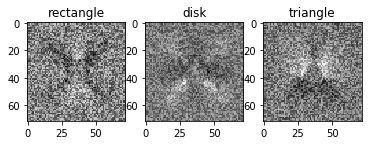

In [11]:
weights = model1.get_weights()[0].reshape(72,72,3)

plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

# A more complicated classification problem
First we generate the data and reshape it for the needs of the convolutional neural network (CNN).
In order to have better results we use training and testing datasets that contain 1,000 images.
Our CNN reaches a performance of:
- 100% training accuracy
- 92% testing accuracy
- 0.3 loss

Note: implementing early stopping would have lowered the final loss reached but seemingly not improved accuracy at testing.

In [167]:
n_samples = 1000

[X_train2, Y_train2] = generate_dataset_classification(n_samples, 20, True)
[X_test2, Y_test2] = generate_test_set_classification(n_samples, True)
Y_train2 = to_categorical(Y_train2)
X_train2 = X_train2.reshape(n_samples,72,72,1)
X_test2 = X_test2.reshape(n_samples,72,72,1)

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200
300
400
500
600
700
800
900


### Trying out the previous model
Spoilers: it doesn't work (because of changing shapes and positions)

In [36]:
X_train_temp = X_train2.reshape(n_samples, 5184)
X_test_temp = X_test2.reshape(n_samples, 5184)

model1.fit(X_train_temp, Y_train2, 
          validation_data=(X_test_temp, Y_test2),
          epochs=20, batch_size=32)

NameError: name 'model1' is not defined

### The final CNN used
64 filters of size 3x3 with 4x4 MaxPooling, 0.5 Dropout and a fully-connected 124-neuron hidden layer.
Loss: cross-entropy; optimizer: adam.

In [168]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(72,72,1), activation='relu'))
model2.add(MaxPooling2D((4,4)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(124, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 70, 70, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 124)               2293628   
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 375       
Total params: 2,294,643
Trainable params: 2,294,643
Non-trainable params: 0
_________________________________________________________________


In [169]:
model2.fit(X_train2, Y_train2, 
          validation_data=(X_test2, Y_test2),
          epochs=50, batch_size=32)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 6s 6ms/step - loss: 1.1095 - acc: 0.4520 - val_loss: 0.9915 - val_acc: 0.5980
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.9216 - acc: 0.6200 - val_loss: 0.8406 - val_acc: 0.6260
Epoch 3/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7476 - acc: 0.7260 - val_loss: 0.7241 - val_acc: 0.7630
Epoch 4/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6383 - acc: 0.7500 - val_loss: 0.6283 - val_acc: 0.8060
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5648 - acc: 0.7880 - val_loss: 0.5804 - val_acc: 0.8080
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5062 - acc: 0.8280 - val_loss: 0.5487 - val_acc: 0.8140
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4523 - acc: 0.8490 - val_loss: 0.5414 - val_acc: 0.8260
Epoch 8/50
100

In [170]:
model2.evaluate(X_test2, Y_test2)

1000/1000 [==============================] - 1s 1ms/step


[0.30928241181373595, 0.918]

# Regression problem

Creating data:
0
100
200
Creating data:
0
100
200


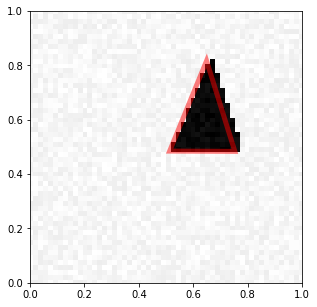

In [5]:
[X_train3, Y_train3] = generate_dataset_regression(300, 20)
[X_test3, Y_test3] = generate_test_set_regression()
X_train3 = X_train3.reshape(300,72,72,1)
X_test3 = X_test3.reshape(300,72,72,1)

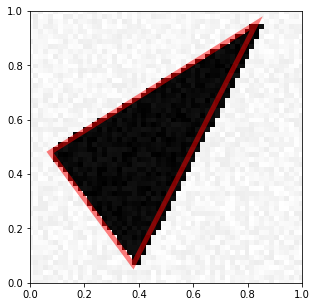

In [8]:
i=2
visualize_prediction(X_train3[i], Y_train4[i])

In [6]:
def sort_vertices(dataset, index):
    middle = 0.5
#     res = np.zeros((dataset.shape))
    res = np.zeros((300, 1))
    for i in range(0, 300):
        temp1 = [dataset[i,2*m]+dataset[i,2*m+1] for m in range(0, 3)]
        j = np.argmax(temp1)
        k = np.argmin(temp1)
        l = 3 - j - k
        temp2 = [dataset[i,2*j]-middle, dataset[i,2*j+1]-middle, 
                dataset[i,2*k]-middle, dataset[i,2*k+1]-middle, 
                dataset[i,2*l]-middle, dataset[i,2*l+1]-middle]
        res[i,:] = [temp2[index]]
    return res

In [7]:
# Y_train4 = sort_vertices(Y_train3)
# Y_test4 = sort_vertices(Y_test3)
Y_train4 = [sort_vertices(Y_train3, i) for i in range(0, 6)]
Y_test4 = [sort_vertices(Y_test3, i) for i in range(0, 6)]

[[0.64931567 0.81676535 0.51356801 0.48456006 0.75334291 0.48353041]
 [0.32791204 0.19995513 0.12796517 0.05726834 0.3317102  0.13003906]
 [0.18326485 0.53552444 0.25674942 0.57666397 0.66274322 0.13832829]
 ...
 [0.25152519 0.07158658 0.24707537 0.90653931 0.42534684 0.54743029]
 [0.82253051 0.38768369 0.67396802 0.28899007 0.2065029  0.62836405]
 [0.5584697  0.3270513  0.98997636 0.60438361 0.53089452 0.8963458 ]]
[array([[ 1.49315665e-01],
       [-1.72087964e-01],
       [-2.43250584e-01],
       [ 2.01014719e-01],
       [ 4.77474184e-01],
       [-7.41982774e-02],
       [ 2.36688310e-01],
       [ 2.57431465e-01],
       [ 1.93794796e-01],
       [-5.19590005e-02],
       [-1.69542988e-01],
       [ 2.20280188e-01],
       [ 6.00560610e-02],
       [-4.20558869e-01],
       [ 1.97088950e-01],
       [ 3.56251662e-01],
       [ 3.29556116e-01],
       [ 2.65541298e-01],
       [-1.58743062e-01],
       [ 4.33678661e-01],
       [ 2.61152534e-01],
       [ 3.10074308e-01],
       

In [15]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(9,9), input_shape=(72,72,1), activation='relu'))
# model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1))
# model3.add(Dense(6))
model3.compile(optimizer='adam', loss='mean_squared_error')
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        2624      
_________________________________________________________________
flatten_3 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4194336   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,196,993
Trainable params: 4,196,993
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
models = [clone_model(model3) for _ in range(0, 6)]
for i in range(0,6):
    print("training model %i" % i)
    models[i].compile(optimizer='adam', loss='mean_squared_error')
    models[i].fit(X_train3, Y_train4[i], 
              validation_data=(X_test3, Y_test4[i]),
              epochs=20, batch_size=64)

training model 0
Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 4s 15ms/step - loss: 65.7669 - val_loss: 0.0893
Epoch 2/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0888 - val_loss: 0.0872
Epoch 3/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0879 - val_loss: 0.0872
Epoch 4/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0880 - val_loss: 0.0873
Epoch 5/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0880 - val_loss: 0.0872
Epoch 6/20
 64/300 [=====>........................] - ETA: 2s - loss: 0.0907

KeyboardInterrupt: 

In [20]:
threshold = 0.05
retrain_from_scratch = True
errors = np.ones((6,2))
for i in range(0, 6):
    try:
        train_error = models[i].evaluate(X_train3, Y_train4[i], verbose = 0)
        test_error = models[i].evaluate(X_test3, Y_test4[i], verbose = 0)
        print("Evaluating model %i: train error %.3f - test error %.3f" % (i, train_error, test_error))
    except:
        try:
            print("\nModel %i/%i was not defined..." % (i, len(models)))
            test_error = 1
        except:
            print("\nModels not defined!")
            models = [clone_model(model3) for _ in range(0, 6)]
    if test_error > threshold:
        print("\n\nRetraining model %i because it was above threshold (%.3f vs %.3f)" % (i, test_error, threshold))
        if retrain_from_scratch:
            models[i] = clone_model(model3)
            models[i].compile(optimizer='adam', loss='mean_squared_error')
        models[i].fit(X_train3, Y_train4[i], 
              validation_data=(X_test3, Y_test4[i]),
              epochs=20, batch_size=64)
        print("\n\n")
        train_error = models[i].evaluate(X_train3, Y_train4[i], verbose = 0)
        test_error = models[i].evaluate(X_test3, Y_test4[i], verbose = 0)
        print("Evaluating model %i: train error %.3f - test error %.3f" % (i, train_error, test_error))
    errors[i,:] = [train_error, test_error]
print("\nDone evaluating models!")
        

Evaluating model 0: train error 0.028 - test error 0.044
Evaluating model 1: train error 0.031 - test error 0.049
Evaluating model 2: train error 0.016 - test error 0.036
Evaluating model 3: train error 0.008 - test error 0.023
Evaluating model 4: train error 0.007 - test error 0.047
Evaluating model 5: train error 0.074 - test error 0.073


Retraining model 5 because it was above threshold (0.073 vs 0.050)
Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 4s 13ms/step - loss: 47.7821 - val_loss: 0.4428
Epoch 2/20
300/300 [==============================] - 3s 11ms/step - loss: 0.4953 - val_loss: 0.0972
Epoch 3/20
300/300 [==============================] - 4s 14ms/step - loss: 0.0871 - val_loss: 0.0913
Epoch 4/20
300/300 [==============================] - 6s 19ms/step - loss: 0.0673 - val_loss: 0.0606
Epoch 5/20
300/300 [==============================] - 5s 17ms/step - loss: 0.0551 - val_loss: 0.0548
Epoch 6/20
300/300 [=================

In [53]:
model3.fit(X_train3, Y_train4, 
          validation_data=(X_test3, Y_test4),
          epochs=20, batch_size=64)

Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 4s 13ms/step - loss: 27.3224 - val_loss: 0.0837
Epoch 2/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0811 - val_loss: 0.0838
Epoch 3/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0812 - val_loss: 0.0838
Epoch 4/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1034 - val_loss: 0.0837
Epoch 5/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0810 - val_loss: 0.0836
Epoch 6/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0809 - val_loss: 0.0834
Epoch 7/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0807 - val_loss: 0.0832
Epoch 8/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0805 - val_loss: 0.0830
Epoch 9/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0802 - val_loss: 0.0828
Epoch 10/20
300/300 [=============================

[0.71457975 0.70325534 0.53495083 0.42076447 0.69979365 0.49714302]


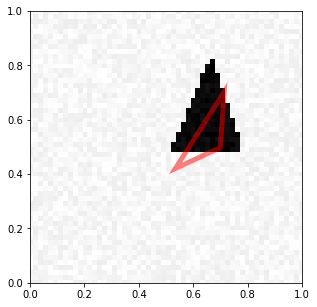

[0.56212942 0.63785551 0.37267822 0.25708939 0.33597802 0.37549852]


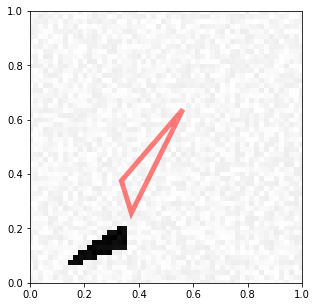

[0.53627677 0.63116361 0.28022477 0.39443224 0.58364175 0.35005443]


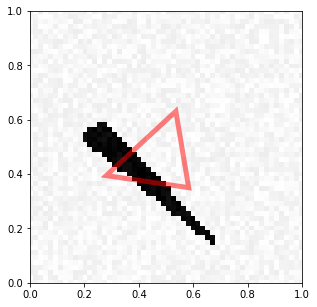

[ 0.43884852  0.50777213 -0.01470965  0.20651868  0.09376466  0.38542615]


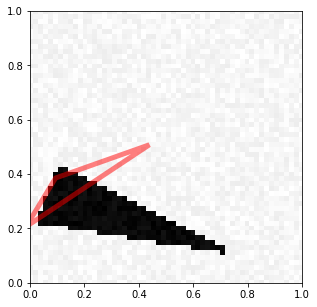

[0.9106659  0.56150167 0.29877636 0.44292244 0.92517722 0.14800906]


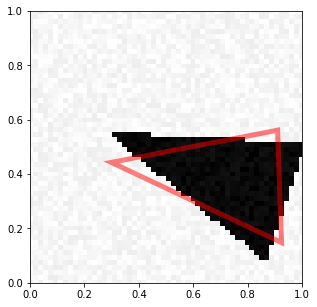

In [21]:
i=5

# print(np.concatenate((Y_train4[i],model.predict(X_train3), models[i].predict(X_train3)),axis=1))
# print(np.concatenate((Y_test4[i],model.predict(X_test3), models[i].predict(X_test3)),axis=1))
# print(Y_test4)
# print(model3.predict(X_test3))

for i in range(0,5):
    predictions = np.array([models[k].predict(X_train3)[i,0]+0.5 for k in range(0,6)])
    visualize_prediction(X_train3[i,:,:], predictions)

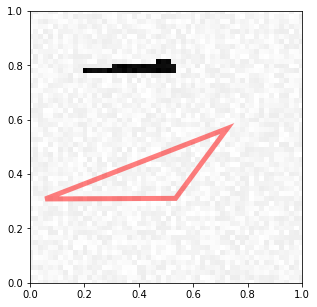

In [178]:
visualize_prediction(X_test3[1],model3.predict(X_test3)[1])